In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../datasets/billionaires.csv')
finalworth = df['finalWorth']

In [4]:
mean_finalWorth = finalworth.mean()
median_finalWorth = finalworth.median()
skewned_finalWorth = finalworth.skew()
kurtosis_finalWorth = finalworth.kurt()

print(f"mean_finalWorth is {mean_finalWorth}")
print(f"median_finalWorth is {median_finalWorth}")
print(f"skewned_finalWorth is {skewned_finalWorth}")
print(f"kurtosis_finalWorth is {kurtosis_finalWorth}")

mean_finalWorth is 4623.787878787879
median_finalWorth is 2300.0
skewned_finalWorth is 10.012367321086751
kurtosis_finalWorth is 145.07368067526582


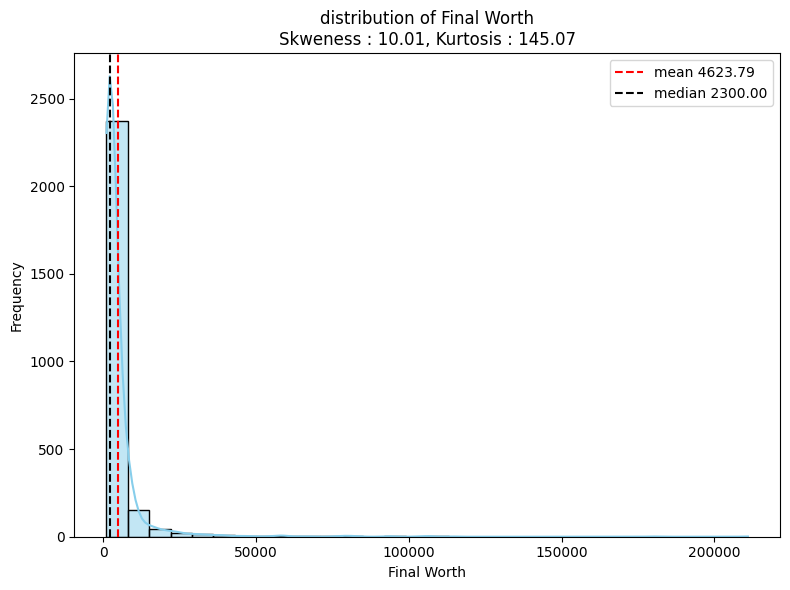

In [6]:
plt.figure(figsize = (8,6))
sns.histplot(finalworth, kde = True, color = 'skyblue', bins = 30)
plt.axvline(mean_finalWorth, color = 'red', linestyle='--', label = f'mean {mean_finalWorth:.2f}')
plt.axvline(median_finalWorth, color = 'black', linestyle='--', label = f'median {median_finalWorth:.2f}')
plt.title(f'distribution of Final Worth\nSkweness : {skewned_finalWorth:.2f}, Kurtosis : {kurtosis_finalWorth:.2f}')
plt.xlabel('Final Worth')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

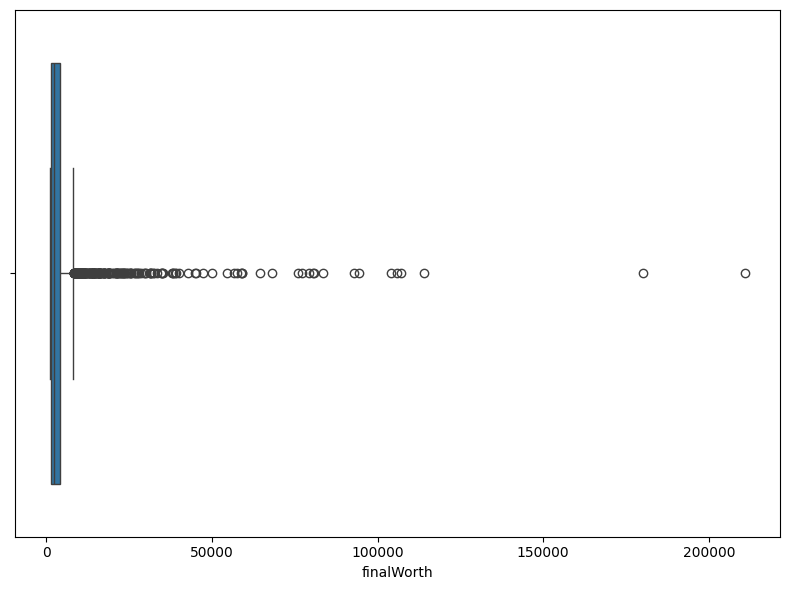

In [9]:
plt.figure(figsize=(8,6))
sns.boxplot(finalworth, orient='h')
plt.tight_layout()
plt.show()

Removing the extereme outliers and retry the process

In [13]:
q1 = df['finalWorth'].quantile(0.25)
q3 = df['finalWorth'].quantile(0.75)
iqr = q3 - q1

lower_fence = q1 - (3 * iqr)
upper_fence = q3 + (3 * iqr)

df['is_extreme_outlier'] = ((df['finalWorth'] > upper_fence) | (df['finalWorth'] < lower_fence))

num_extreme_outliers = df['is_extreme_outlier'].sum()
print(f"Number of extreme outliers is identified : {num_extreme_outliers}")

Number of extreme outliers is identified : 140


In [14]:
#Remove extreme outliers

df = df[df['is_extreme_outlier'] == False].copy()
finalworth = df['finalWorth']
mean_finalWorth = finalworth.mean()
median_finalWorth = finalworth.median()
skewned_finalWorth = finalworth.skew()
print(skewned_finalWorth)

1.6646313461296731


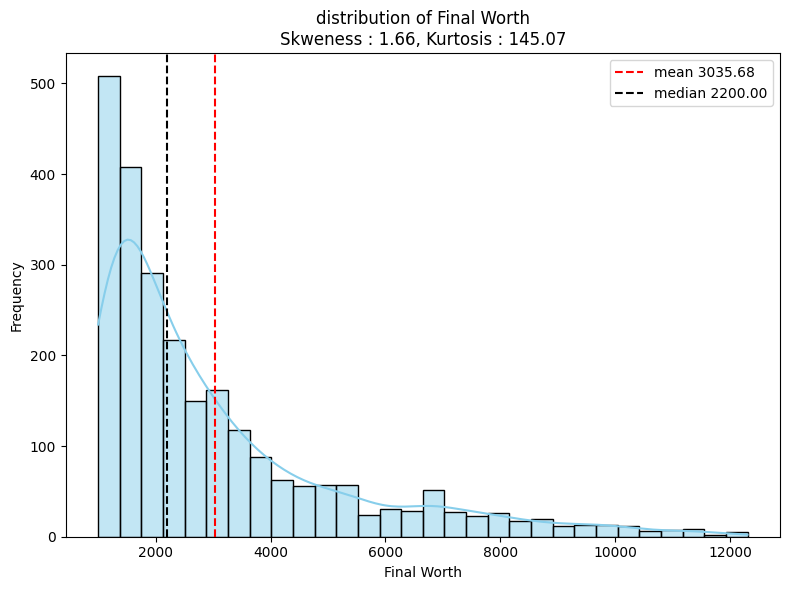

In [18]:
# plt.figure(figsize = (8,6))
# sns.histplot(finalworth, kde = True, color = 'skyblue', bins = 30)
# plt.axvline(mean_finalWorth, color = 'red', linestyle = '--', label = f"Mean : {mean_finalWorth:.2f}")
# plt.axvline(median_finalWorth, color = 'black', linestyle = '--', label = f"Median : {median_finalWorth:.2f}")

# plt.xlabel('Final Worth')
# plt.ylabel('Frequency')

plt.figure(figsize = (8,6))
sns.histplot(finalworth, kde = True, color = 'skyblue', bins = 30)
plt.axvline(mean_finalWorth, color = 'red', linestyle='--', label = f'mean {mean_finalWorth:.2f}')
plt.axvline(median_finalWorth, color = 'black', linestyle='--', label = f'median {median_finalWorth:.2f}')
plt.title(f'distribution of Final Worth\nSkweness : {skewned_finalWorth:.2f}, Kurtosis : {kurtosis_finalWorth:.2f}')
plt.xlabel('Final Worth')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

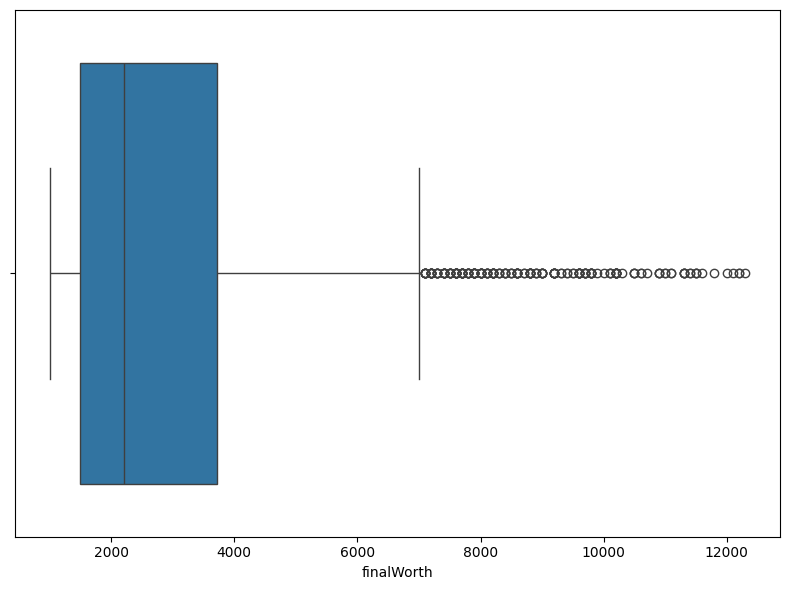

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(finalworth, orient='h')
plt.tight_layout()
plt.show()

In [16]:
#Compare two CoV Corefficinet of varience for two categories

group1_name = 'Fashion & Retail'
group2_name = 'Technology'

group1 = df[df['category'] == group1_name]['finalWorth']
group2 = df[df['category'] == group2_name]['finalWorth']

#Calculate CoV 
cov_group1 = group1.std()/group1.mean() * 100
cov_group2 = group2.std()/group2.mean() * 100


print(f"Coefficient of Variance (CoV) for {group1_name} : {cov_group1:.2f}%")
print(f"Coefficient of Variance (CoV) for {group2_name} : {cov_group2:.2f}%")

Coefficient of Variance (CoV) for Fashion & Retail : 73.09%
Coefficient of Variance (CoV) for Technology : 77.09%
